### 01. Importando csv e fazendo analise inicial.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_churn = pd.read_csv('churn.csv', index_col='RowNumber')
df_churn.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [120]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.3+ MB


In [46]:
df_churn.Geography.value_counts() # Verificando quais são os países da mostra e quantos dados tem de cada um.

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [47]:
df_churn_porcentagem = (df_churn.Geography.value_counts() / df_churn.Geography.value_counts().sum()) * 100
df_churn_porcentagem.head()

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

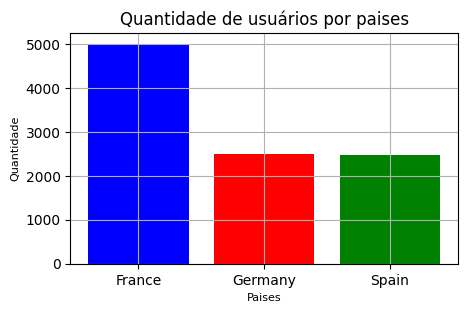

In [127]:
labels = ['France', 'Germany', 'Spain']
vals = df_churn.Geography.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['blue', 'red', 'green'])
ax.set_title('Quantidade de usuários por paises', fontsize=12)

ax.set_ylabel('Quantidade', fontsize=8)
ax.set_xlabel('Paises', fontsize=8)
ax.grid()
plt.show()


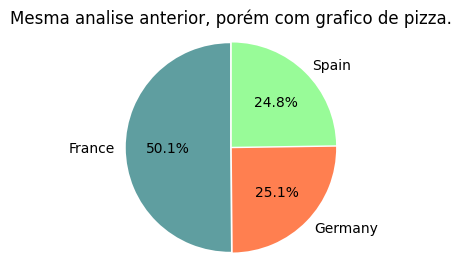

In [136]:
labes = ['France', 'Germany', 'Spain']
sizes = [50.14, 25.09, 24.77]

explode = [0.01, 0.01, 0.01]

fig, ax1 = plt.subplots(figsize=(5, 3))

cores = ['#5F9EA0', '#FF7F50', '#98FB98']

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=cores)

ax1.set_title('Mesma analise anterior, porém com grafico de pizza.')

ax1.axis('equal')

plt.show()

#### O DF tem 3 paises, França, Alemanha e Espanha, sendo a França com a maior quantidade de clientes, representando 50.14 % do total de 10 mil clientes.

In [11]:
arr_delete = ['CustomerId', 'Surname'] # Criando arrei de colunas que não são interessantes para a analise.

df_churn.drop(arr_delete, axis=1, inplace = True) # Usando o drop() para deletar colunas que foram selecionadas no arrei.
df_churn.head(10) # Novo data frame sem as colunas.

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [12]:
df_churn.info() # Verificando o tipo das informações do data frame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [107]:
df_churn_exited = df_churn.loc[df_churn['Exited']==1] # separando clientes que sairam.
df_churn_exited

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


In [82]:
df_churn_sairam_porc = (df_churn.Exited.value_counts() / df_churn.Exited.value_counts().sum()) * 100 # verificando porcentagem dos clientes que sairam.
df_churn_sairam_porc

0    79.63
1    20.37
Name: Exited, dtype: float64

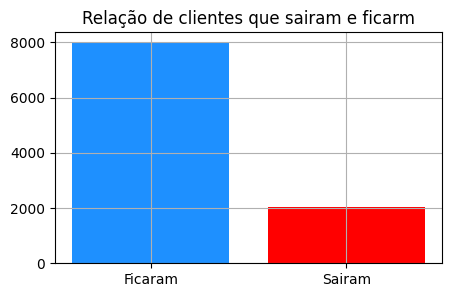

In [125]:
labels = ['Ficaram', 'Sairam']
vals = df_churn.Exited.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['DodgerBlue', 'red'])
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()


### Os clientes que sairam represetam 20.37%, sendo 2037.

In [91]:
df_churn_mulher = df_churn_sairam.loc[(df_churn_sairam['Gender']=='Female') & (df_churn_sairam['Exited']==1) ] # Separando por genero dentro dos clientes que sairam.
df_churn_mulher

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


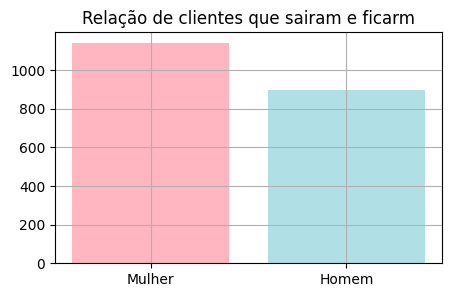

In [116]:
labels = ['Mulher', 'Homem']
vals = df_churn_exited.Gender.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['#FFB6C1', '#B0E0E6'])
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()


In [139]:
print(df_churn_exited['Age'].max())
print(df_churn_exited['Age'].min())

84
18


In [147]:
labels = [18:84]
vals = df_churn_exited.Gender.value_counts()
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(labels, vals, color=['#FFB6C1', '#B0E0E6'])
ax.grid()
ax.set_title('Relação de clientes que sairam e ficarm', fontsize=12)

plt.show()

SyntaxError: invalid syntax (3801415.py, line 1)

## -----Analise Inicial-----
### Das 2037 pessoas que sairam:
#### - 1139 são mulheres;
#### -

### Verificando a relação entre idade e genero dentre os que sairam.